# Crafting a Story Dataset

In this notebook I do some light investigation into a data set of nutrition facts of Starbucks beverages. The purpose of this assignment is to practice my storytelling skills on a data set. To that end, I will do a modest amount of exploratory analysis to learn something about my data set, so that I may practice presenting my findings. The best data analysis is useless if you cannot communicate your findings to different audiences. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Wrangling

In [2]:
df = pd.read_csv('starbucks_drinkMenu_expanded.csv')

In [3]:
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [4]:
df.shape

(242, 18)

In [5]:
df.isna().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

In [6]:
# Get rid of the unnecessary spaces before and after column names
column_names = df.columns
cleaner_names = []
for name in column_names:
    name = name.strip()
    cleaner_names.append(name)

mapper = dict(zip(column_names, cleaner_names))
df.rename(mapper = mapper, axis = 'columns', inplace = True)

In [7]:
# Now back to finding the null value
df.loc[df.isnull().any(axis=1)]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
158,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,90,1,0.5,0.0,5,25,18,0,18,2.0,2%,0%,6%,0.00%,NaN


In [8]:
# Take a look at the other caffeine values for shaken iced beverages, which our null value happens to be
# Drop some columns to make the returned df a little easier to read
df[df['Beverage_category'] == 'Shaken Iced Beverages'].drop(columns = list(df.columns[3:17]))

,Beverage_category,Beverage,Beverage_prep,Caffeine (mg)
154,Shaken Iced Beverages,Iced Brewed Coffee (With Classic Syrup),Tall,120
155,Shaken Iced Beverages,Iced Brewed Coffee (With Classic Syrup),Grande,165
156,Shaken Iced Beverages,Iced Brewed Coffee (With Classic Syrup),Venti,235
157,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Tall Nonfat Milk,90
158,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,NaN
159,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Soymilk,90
160,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Grande Nonfat Milk,90
161,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,125
162,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Soymilk,125
163,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Venti Nonfat Milk,125


In [9]:
# Replace the missing value with a caffeine value of 90 like its similar neighbors
df.fillna(value=90, inplace = True)
df.isna().sum()

Beverage_category          0
Beverage                   0
Beverage_prep              0
Calories                   0
Total Fat (g)              0
Trans Fat (g)              0
Saturated Fat (g)          0
Sodium (mg)                0
Total Carbohydrates (g)    0
Cholesterol (mg)           0
Dietary Fibre (g)          0
Sugars (g)                 0
Protein (g)                0
Vitamin A (% DV)           0
Vitamin C (% DV)           0
Calcium (% DV)             0
Iron (% DV)                0
Caffeine (mg)              0
dtype: int64

In [10]:
df.dtypes

Beverage_category           object
Beverage                    object
Beverage_prep               object
Calories                     int64
Total Fat (g)               object
Trans Fat (g)              float64
Saturated Fat (g)          float64
Sodium (mg)                  int64
Total Carbohydrates (g)      int64
Cholesterol (mg)             int64
Dietary Fibre (g)            int64
Sugars (g)                   int64
Protein (g)                float64
Vitamin A (% DV)            object
Vitamin C (% DV)            object
Calcium (% DV)              object
Iron (% DV)                 object
Caffeine (mg)               object
dtype: object

In [11]:
# Many of these should be numbers, but are objects. Let's look at them.
df['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [12]:
nums = df['Total Fat (g)'].unique()
nums[-1]

'3 2'

In [13]:
# Seems like a simple mistake of a space instead of a decimal point
df[df['Total Fat (g)'] == '3 2']

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0


In [14]:
df['Total Fat (g)'].replace(to_replace= '3 2', value= '3.2', inplace=True)

In [15]:
df['Total Fat (g)'] = pd.to_numeric(df['Total Fat (g)'])

In [16]:
df['Vitamin A (% DV)'].unique()

array(['0%', '10%', '6%', '15%', '20%', '30%', '25%', '8%', '4%', '2%',
       '50%'], dtype=object)

In [17]:
df['Vitamin C (% DV)'].unique()

array(['0%', '2%', '4%', '6%', '10%', '15%', '20%', '80%', '100%', '8%'],
      dtype=object)

In [18]:
df['Calcium (% DV)'].unique()

array(['0%', '2%', '20%', '30%', '40%', '50%', '15%', '25%', '35%', '45%',
       '10%', '60%', '6%', '8%'], dtype=object)

In [19]:
df['Iron (% DV)'].unique()

array(['0%', '8%', '15%', '25%', '10%', '20%', '30%', '40%', '50%', '6%',
       '2%', '4%', '0.00%', '6.00%', '8.00%', '10.00%', '15.00%', '35%'],
      dtype=object)

In [20]:
# Vitamin A, vitamin C, calcium, and iron all have the same problem.
# Remove the % signs and change the column to numeric
columns = ['Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)']
for column in columns:
    df[column] = pd.to_numeric(df[column].str.replace('%', ''))

In [21]:
df['Caffeine (mg)'].unique()

array(['175', '260', '330', '410', '75', '150', '85', '95', '180', '225',
       '300', '10', '20', '25', '30', '0', 'Varies', '50', '70', '120',
       '55', '80', '110', 'varies', '165', '235', '90', 90, '125', '170',
       '15', '130', '140', '100', '145', '65', '105'], dtype=object)

In [22]:
# Make numerical all the entries for caffeine that can be changed
df['Caffeine (mg)'] = pd.to_numeric(df['Caffeine (mg)'], errors = 'coerce')
df['Caffeine (mg)'].fillna(value='varies', inplace = True)

In [23]:
# Check that the changes to our data types worked as intended
df.dtypes

Beverage_category           object
Beverage                    object
Beverage_prep               object
Calories                     int64
Total Fat (g)              float64
Trans Fat (g)              float64
Saturated Fat (g)          float64
Sodium (mg)                  int64
Total Carbohydrates (g)      int64
Cholesterol (mg)             int64
Dietary Fibre (g)            int64
Sugars (g)                   int64
Protein (g)                float64
Vitamin A (% DV)             int64
Vitamin C (% DV)             int64
Calcium (% DV)               int64
Iron (% DV)                float64
Caffeine (mg)               object
dtype: object

### Data Exploration

In [24]:
df.describe()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,2.904959,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512,9.830579,3.648760,20.756198,7.446281
std,102.863303,2.944376,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659,8.097962,14.421794,14.542343,10.486467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.200000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000,4.000000,0.000000,10.000000,0.000000
50%,185.000000,2.500000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000,8.000000,0.000000,20.000000,2.000000
75%,260.000000,4.500000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000,15.000000,0.000000,30.000000,10.000000
max,510.000000,15.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000,50.000000,100.000000,60.000000,50.000000


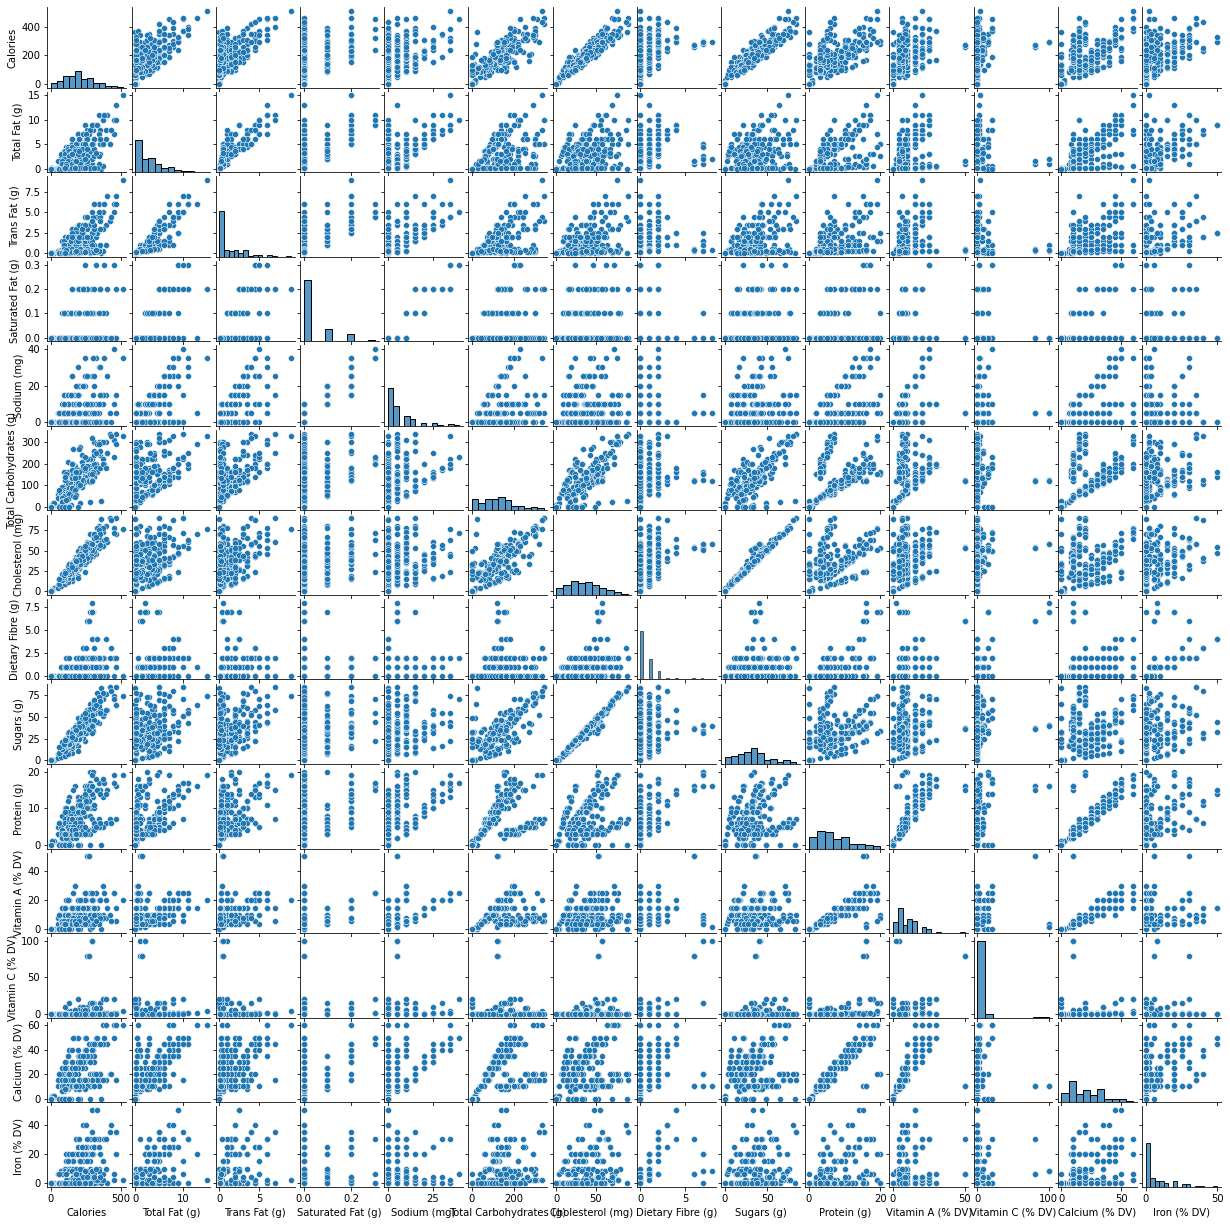

In [25]:
# There are too many plots, this is too crowded. We'll have to constrain our investigation in some way.
p_plot = sns.pairplot(df)
p_plot.fig.set_size_inches(17,17)
plt.show()

In [26]:
# Since there are so many beverage preperation types, like size and with what kind of milk it was prepared with,
# we'll make a dataframe grouped by the average amounts of each feature for each kind of beverage.
beverages = pd.DataFrame(df.groupby(by = 'Beverage_category').mean())
beverages.reset_index(inplace = True)
beverages.shape

(9, 15)

In [27]:
beverages

,Beverage_category,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV)
0,Classic Espresso Drinks,140.172414,3.127586,1.210345,0.046552,8.103448,104.672414,20.327586,0.620690,16.965517,8.686207,12.724138,0.206897,27.344828,8.103448
1,Coffee,4.250000,0.100000,0.000000,0.000000,0.000000,8.750000,0.000000,0.000000,0.000000,0.700000,0.000000,0.000000,0.500000,0.000000
2,Frappuccino® Blended Coffee,276.944444,3.002778,1.700000,0.038889,4.444444,230.277778,59.638889,0.777778,57.083333,4.222222,5.500000,0.000000,12.277778,10.861111
3,Frappuccino® Blended Crème,233.076923,1.953846,0.769231,0.038462,4.230769,188.846154,49.923077,0.307692,48.461538,4.000000,6.153846,4.615385,13.846154,3.846154
4,Frappuccino® Light Blended Coffee,162.500000,1.258333,0.900000,0.000000,1.666667,217.500000,34.500000,0.666667,32.416667,4.250000,6.000000,0.000000,11.333333,9.000000
5,Shaken Iced Beverages,114.444444,0.472222,0.138889,0.005556,1.111111,18.277778,26.166667,0.000000,26.000000,1.344444,1.777778,2.500000,4.000000,0.666667
6,Signature Espresso Drinks,250.000000,5.275000,2.712500,0.050000,9.625000,138.250000,42.775000,0.775000,38.600000,9.875000,13.150000,0.750000,31.375000,10.550000
7,Smoothies,282.222222,2.333333,0.933333,0.011111,6.111111,132.777778,54.555556,6.777778,36.777778,17.111111,20.444444,65.000000,13.333333,11.777778
8,Tazo® Tea Drinks,177.307692,2.540385,0.859615,0.044231,7.211538,89.903846,31.692308,0.519231,30.307692,6.807692,10.557692,2.903846,23.653846,4.673077


It's widely known that standard brewed coffee with nothing added is very inert, nutritionally. The caffeine content certainly does things to the body, but caffeine is not a nutrient. Recall that the macronutrients, protein, carbohydrates, and fats are responsible for the caloric content in a food or beverage. Straight brewed coffee is nearly completely void of calories, and therefore completely void of fat, carbohydrates, and protein of any kind. It is also basically void of micronutrients, like the vitamins and minerals, and fiber. 

The following two figures represent this.

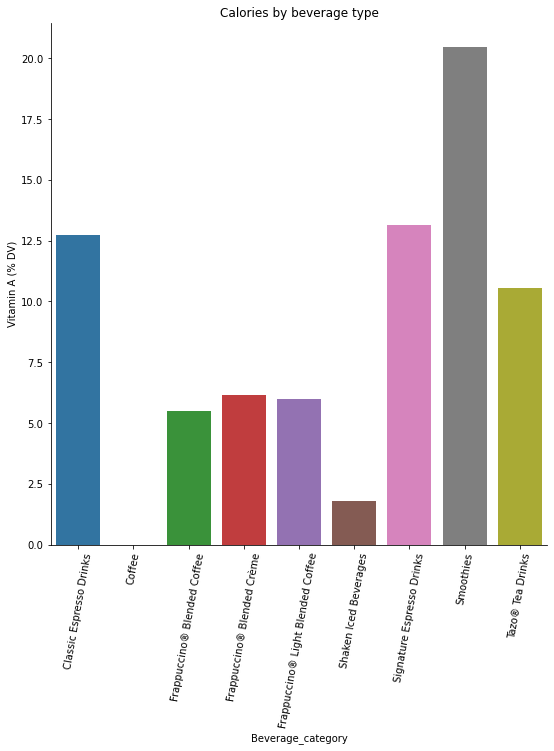

In [28]:
sns.catplot(data = beverages, x = 'Beverage_category', y = 'Vitamin A (% DV)', kind = 'bar',  height = 8)
plt.title('Calories by beverage type')
plt.xticks(rotation = 80)
plt.show()

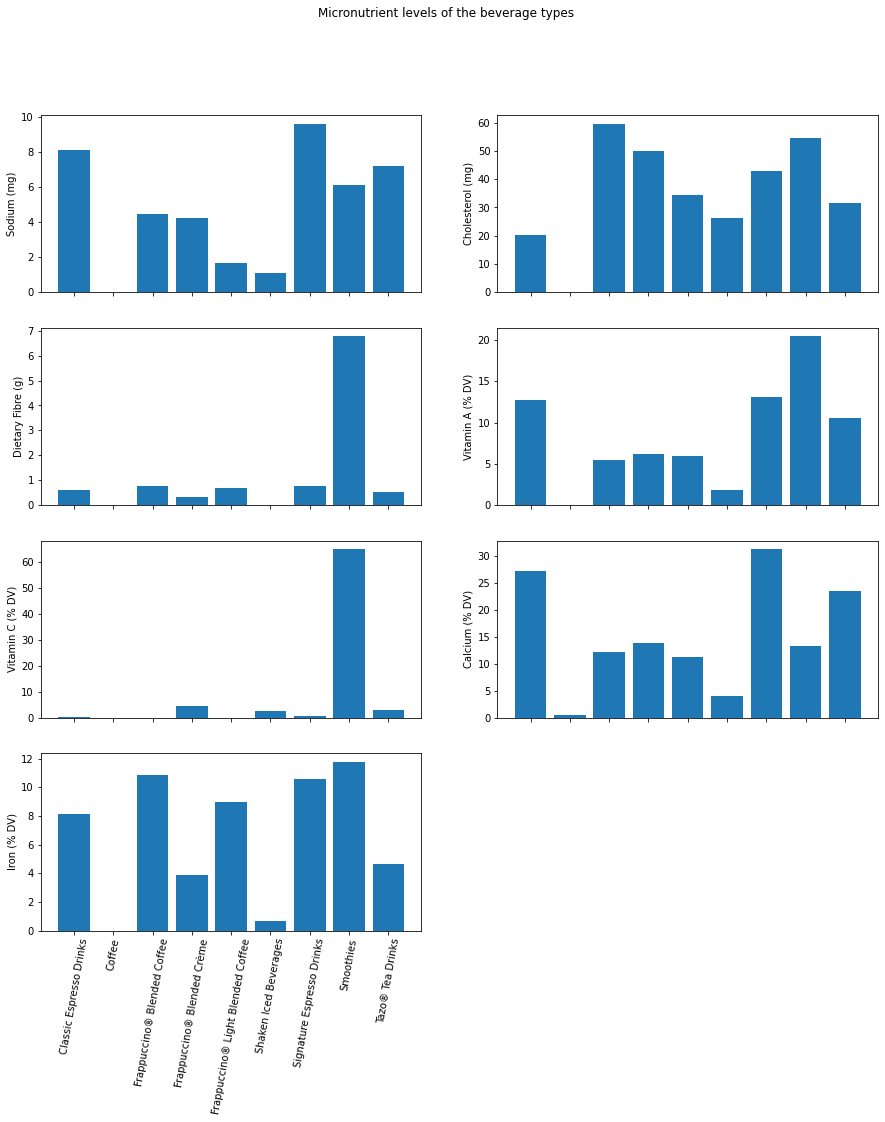

In [29]:
micronutrients = ['Sodium (mg)', 'Cholesterol (mg)', 'Dietary Fibre (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)',
                  'Calcium (% DV)', 'Iron (% DV)', 'Iron (% DV)']
incrementer = 0
f, axs = plt.subplots(4, 2, sharex = True, figsize=(15,15))
f.delaxes(axs[3,1])
for i in range(len(axs)):
    for j in range(len(axs[i])):
        axs[i, j].bar(x = beverages.Beverage_category, height = beverages[micronutrients[incrementer]])
        axs[i, j].set_ylabel(micronutrients[incrementer])
        incrementer += 1
f.suptitle('Micronutrient levels of the beverage types')
plt.xticks(rotation = 80)
plt.show()

So while it may be no secret that plain coffee is the least unhealthy item on the Starbucks menu (setting aside the effects of caffeine), which item or kind of item is the healthiest? What do we even mean by healthiest? In this investigation, we take a healthy item to be one that is relatively low in sugar, relatively low in trans fats, and relatively high in fiber, vitamins, and minerals. We believe total calories, total carbohydrates, cholesterol, or saturated fat, alone, are not indicators of an unhealthy food. Carbohydrates, protein, and fat are all necessary macro nutrients that your body makes good use of for cell structure and energy. Cholesterol is also necessary for some bodily functions. 

I assume smoothies are the healthiest item on the menu. Keeping this in mind, let us investigate the different drinks.

In [30]:
# Get rid of the plain coffee row
beverages.drop(index = 1, inplace  = True)

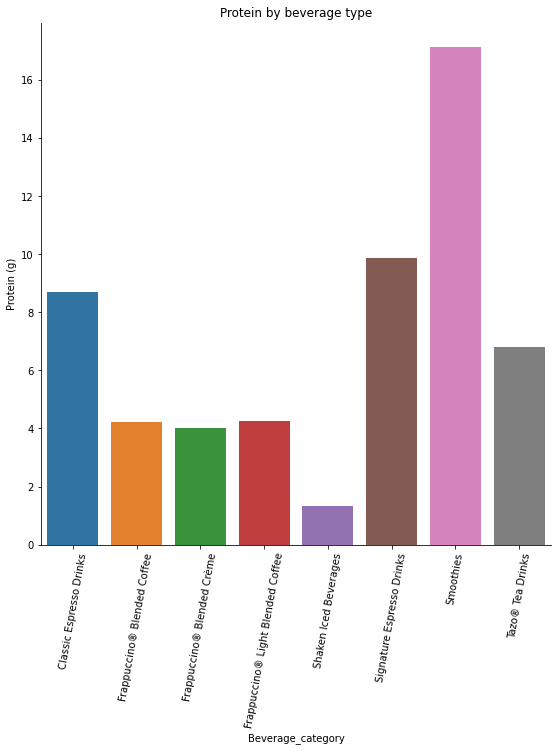

In [31]:
# Smoothies have the most protein by a wide margin
sns.catplot(data = beverages, x = 'Beverage_category', y = 'Protein (g)', kind = 'bar',  height = 8)
plt.title('Protein by beverage type')
plt.xticks(rotation = 80)
plt.show()

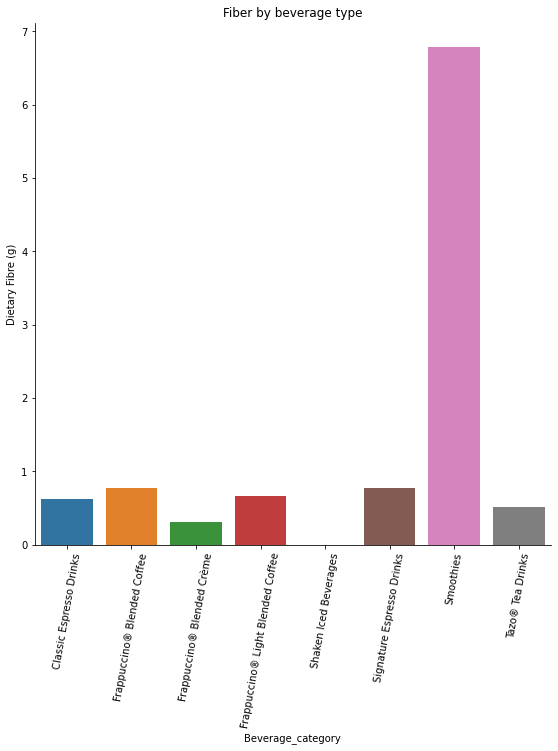

In [32]:
# Smoothies have the most fiber by a wide margin
sns.catplot(data = beverages, x = 'Beverage_category', y = 'Dietary Fibre (g)', kind = 'bar',  height = 8)
plt.title('Fiber by beverage type')
plt.xticks(rotation = 80)
plt.show()

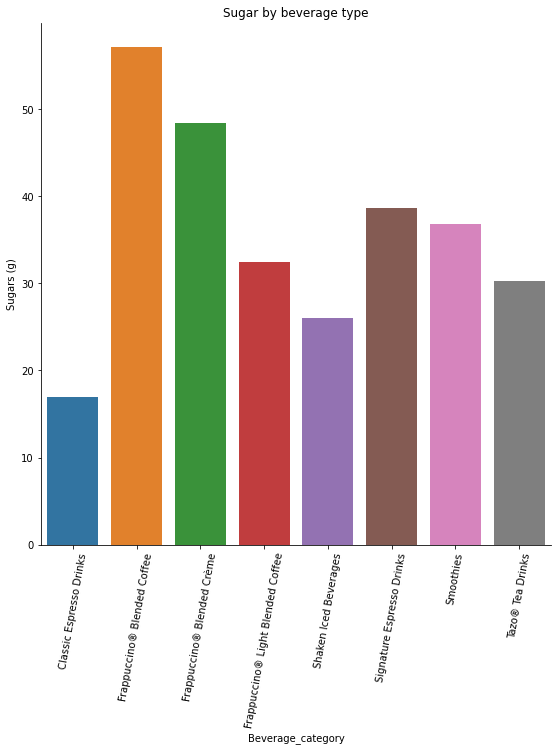

In [33]:
# Smoothies are pretty high in sugar. 
sns.catplot(data = beverages, x = 'Beverage_category', y = 'Sugars (g)', kind = 'bar',  height = 8)
plt.title('Sugar by beverage type')
plt.xticks(rotation = 80)
plt.show()

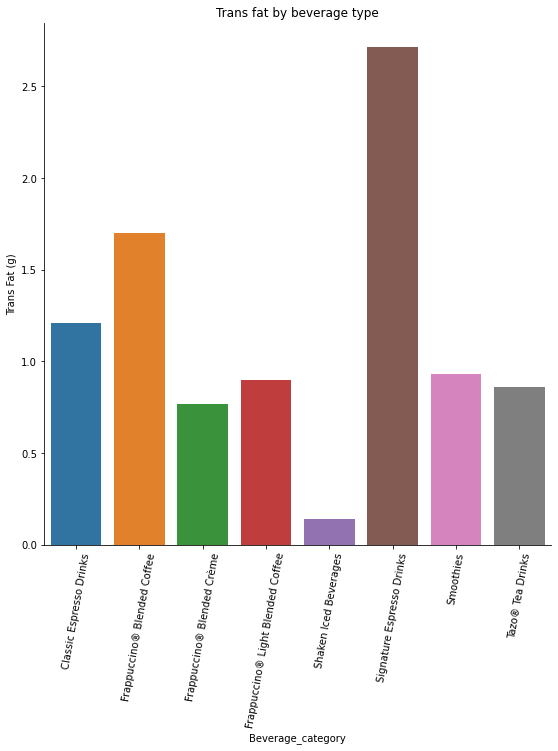

In [34]:
# Smoothies are pretty low in trans fat
sns.catplot(data = beverages, x = 'Beverage_category', y = 'Trans Fat (g)', kind = 'bar',  height = 8)
plt.title('Trans fat by beverage type')
plt.xticks(rotation = 80)
plt.show()

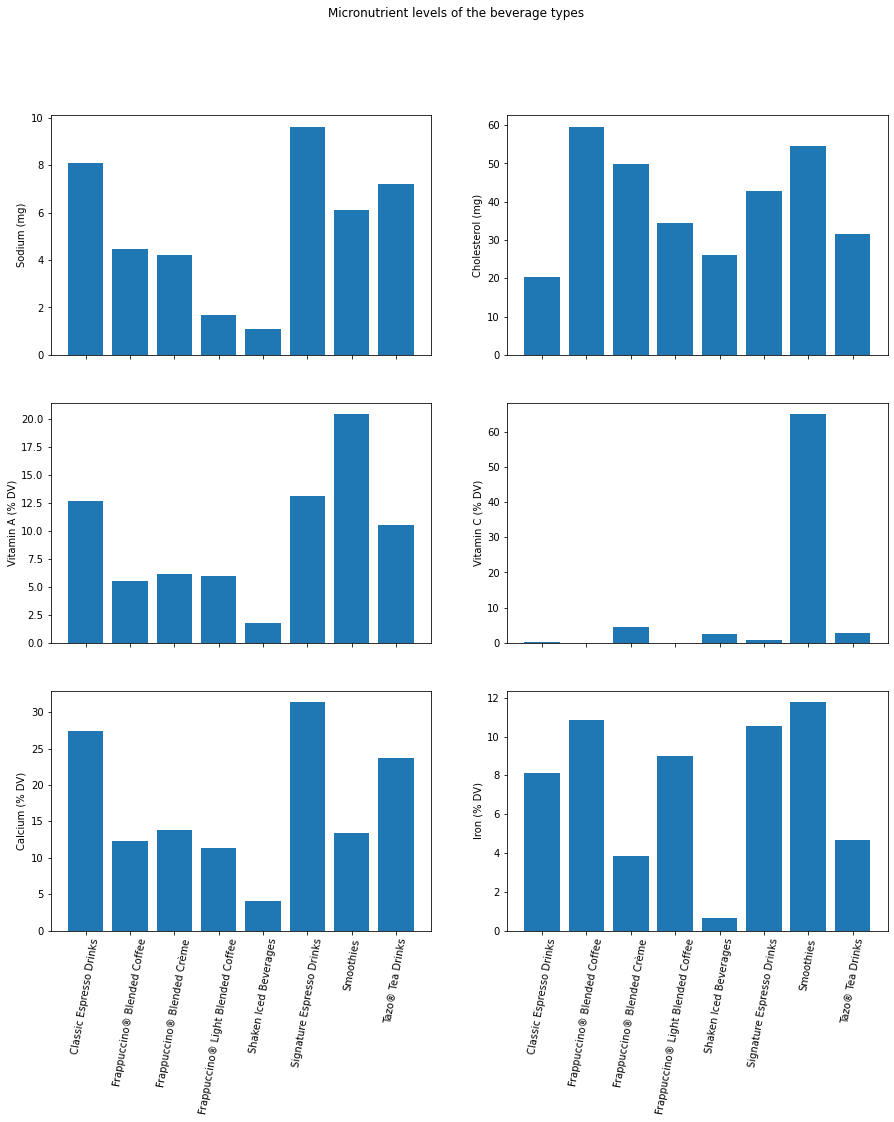

In [35]:
# Lastly, we reproduce code from above to see micronutrient plots
# Smoothies have the most vitamins and iron, but don't top any of the other categories here

micronutrients = ['Sodium (mg)', 'Cholesterol (mg)', 'Vitamin A (% DV)', 'Vitamin C (% DV)',
                  'Calcium (% DV)', 'Iron (% DV)']
incrementer = 0
f, axs = plt.subplots(3, 2, sharex = True, figsize=(15,15))

for i in range(len(axs)):
    for j in range(len(axs[i])):
        axs[i, j].bar(x = beverages.Beverage_category, height = beverages[micronutrients[incrementer]])
        axs[i, j].set_ylabel(micronutrients[incrementer])
        incrementer += 1
f.suptitle('Micronutrient levels of the beverage types')
plt.xticks(rotation = 80)
plt.sca(axs[2, 0])
plt.xticks(rotation = 80)

plt.show()

In [36]:
# Let's get a representation of categories that the healthiest looking drinks top
categories_to_max = ['Dietary Fibre (g)', 'Protein (g)', 'Vitamin A (% DV)', 
                     'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)']
categories_to_min = ['Trans Fat (g)', 'Sodium (mg)', 'Sugars (g)']
healthiest = []
# These for loops help generate a list of the drinks that 'won' in, for example, having the most fiber, or the least sugar
for i in categories_to_max:
    healthiest.append(beverages[beverages[i] == max(beverages[i])]['Beverage_category'].tolist())
for j in categories_to_min:
    healthiest.append(beverages[beverages[j] == min(beverages[j])]['Beverage_category'].tolist())

In [37]:
# Get a list of each drink that appeared in the healthiest list
healthiest_unique = np.unique(healthiest)

# This gets the count of how many times each beverage appeared in the healthiest list
counts = []
for k in healthiest_unique:
    counts.append(healthiest.count([k]))

# A dicitonary of each beverage paired with the number of times it 'won' in a healthy category
mapper = dict(zip(healthiest_unique, counts))

# Make a dataframe out of the above dictionary, for easier plotting
comparison = pd.DataFrame(mapper, index = [0])

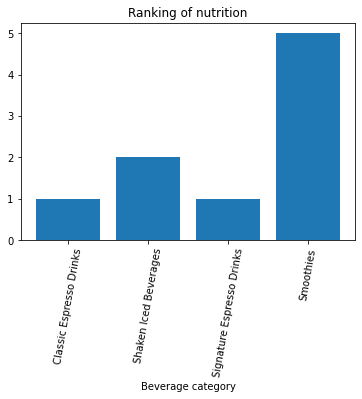

In [38]:
# Plot the beverages and the number of times they were the healthiest in a category
plt.bar(x = comparison.columns, height = comparison.iloc[0])
plt.xticks(rotation = 80)
plt.xlabel('Beverage category')
plt.title('Ranking of nutrition')
plt.show()

Our short analysis confirms what we had assumed: smoothies appear to be the healthiest beverage on the menu. I had hoped to be surprised by smoothies being less healthy than the two types of espresso drinks, given that the smoothies are mostly fruit, meaning a lot of sugar, and the espresso drinks (like lattes) are mostly milk, meaning a fair bit of protein. It turns out that this wasn't the case, as smoothies destroyed every other kind of drink in the protein category; the espresso drinks taking a modest 2nd and 3rd place.

Something that was very surprising was how high the Signature Espresso Drinks beverage type was on trans fats, especially compared to the frappuccino drinks! The two non-light frap drinks led the pack in sugar content, but not in trans fats. Moreover, the classic frap drink won second place for trans fats, solidifying its place as what is likely the least healthy drink on the menu. More investigation is required to find out why Signature Espresso Drinks have so much trans fats, but not their Classic Espresso Drink counterparts.

Shaken Iced Beverages take second place for healthiest drink, with their low trans fats, low sugar, and low sodium. Unsurprisingly, smoothies knock it out of the park in the vitamin and mineral department. 

The next step for this project would be to peer into each beverage category to see how preparation methods affect their health value. As a reminder, most of bar graphs generated here were using a grouped version of the data, grouped by average value for the numerical columns. As we can imagine, making your drink with whole milk vs skim, the size of your beverage if it does have sugar, and more could all significantly affect how healthy or unhealthy it is.